In [1]:
!pip install rasterio
!pip install pyproj
!pip install geopandas
!pip install deepforest
!pip install --upgrade PyYAML

     |████████████████████████████████| 18.1MB 1.3MB/s 
     |████████████████████████████████| 10.9MB 2.5MB/s 
     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 384kB/s 
     |████████████████████████████████| 9.3MB 2.7MB/s 
     |████████████████████████████████| 378kB 45.5MB/s 
     |████████████████████████████████| 109.2MB 50kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 3.2MB 44.8MB/s 
     |████████████████████████████████| 491kB 40.2MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13345 sha256=21e2f457059f99b86808fc7082a44545558da63a42388144d03155cfc2487fd2
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-resnet
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Found existing instal

In [2]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import geopandas as geo
from shapely.geometry import mapping

In [3]:
def details(filepath):
  src=rasterio.open(filepath)
  print(src.profile)
  array = src.read()
  array_min, array_max = array.min(), array.max()
  print(array_min,array_max)
  l=array.shape
  print(l)
  from rasterio.plot import show
  show(src)
  return src

In [4]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 200, 'height': 200, 'count': 3, 'crs': CRS.from_epsg(32617), 'transform': Affine(0.1, 0.0, 542371.0,
       0.0, -0.1, 4136755.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}
16.0 247.0
(3, 200, 200)


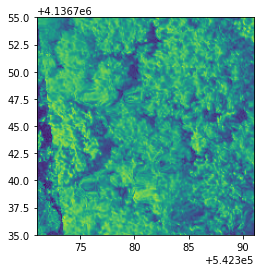

In [14]:
img=details('/content/drive/My Drive/Capstone/IDTREES_competition_train/RemoteSensing/RGB/MLBS_2.tif')

(200, 200, 3)


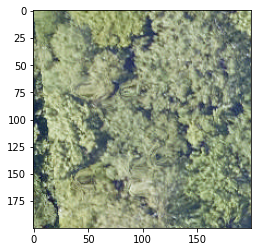

In [15]:
# Convert to numpy arrays
band1 = img.read(1)
band2 = img.read(2)
band3 = img.read(3)

# Normalize band DN
band1_norm = normalize(band1)
band2_norm = normalize(band2)
band3_norm = normalize(band3)
stackimg1 = np.dstack((band1,band2,band3))
#stack image
stackimg = np.dstack((band1_norm,band2_norm,band3_norm))
print(stackimg.shape)

# View the color composite
plt.imshow(stackimg)

In [18]:
import cv2
cv2.imwrite("try.jpg", stackimg1) 

True

Reading config file: /usr/local/lib/python3.6/dist-packages/deepforest/data/deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/v0.3.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/v0.3.0
tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors


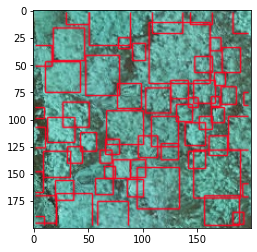

In [19]:
import matplotlib.pyplot as plt
from deepforest import deepforest
from deepforest import get_data

test_model = deepforest.deepforest()
test_model.use_release()

#predict image
#image=get_data(path)
image = test_model.predict_image(image_path ="/content/try.jpg")#'/usr/local/lib/python3.6/dist-packages/deepforest/data/OSBS_029.tif')

#Show image, matplotlib expects RGB channel order, but keras-retinanet predicts in BGR
plt.imshow(image[...,::-1])
plt.show()

In [20]:
cv2.imwrite("output.jpg", image) 

True

In [10]:
stackimg.flatten().shape

(120000,)

In [11]:
df = geo.read_file('/content/drive/My Drive/Capstone/IDTREES_competition_train/ITC/train_MLBS.shp')
g = [i for i in df.geometry]
all_coords = mapping(g[0])["coordinates"] # for first feature/row
all_coords

(((542063.4678646934, 4134979.3212143932),
  (542063.4678646934, 4134986.132135306),
  (542070.5270613107, 4134986.132135306),
  (542070.5270613107, 4134979.3212143932),
  (542063.4678646934, 4134979.3212143932)),)

In [12]:
img.index(542063.4678646934, 4134979.3212143932)

(196, 84)

In [13]:
img.xy(196, 84)

(542063.4500000001, 4134979.35)